# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [194]:
import numpy as np
import pandas as pd

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [195]:
websites = pd.read_csv('../website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [196]:
# What the dataset looks like?
print("Primeras filas del conjunto de datos:")
print(websites.head())

Primeras filas del conjunto de datos:
       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21                NaN  ...        

In [197]:
# What are the data types?
print("\nTipos de datos:")
print(websites.dtypes)


Tipos de datos:
URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


In [198]:
# Which columns contain the features of the websites?
print("\nLas características de los sitios web son todas las columnas excepto Type, que es la variable objetivo.")
print("\nLista de columnas del dataset:")
print(websites.columns)


Las características de los sitios web son todas las columnas excepto Type, que es la variable objetivo.

Lista de columnas del dataset:
Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


In [199]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
print("\nDistribución de la columna objetivo (Type):")
print(websites['Type'].value_counts())  # 0 para benignos, 1 para maliciosos
print("\n0 = benigno, 1 = malicioso.")



Distribución de la columna objetivo (Type):
Type
0    1565
1     216
Name: count, dtype: int64

0 = benigno, 1 = malicioso.


In [200]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
categorical_columns = websites.select_dtypes(include=['object']).columns
print("\nColumnas categóricas:")
print(categorical_columns)

print("\nEjemplo de valores únicos en columnas categóricas:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(websites[col].unique())


Columnas categóricas:
Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')

Ejemplo de valores únicos en columnas categóricas:

URL:
['M0_109' 'B0_2314' 'B0_911' ... 'B0_162' 'B0_1152' 'B0_676']

CHARSET:
['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8' nan 'windows-1251'
 'ISO-8859' 'windows-1252']

SERVER:
['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' nan 'Apache/2'
 'nginx/1.10.1' 'Apache' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'openresty/1.11.2.1' 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)'
 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'cloudflare-nginx' 'nginx/1.6.2'
 'openresty' 'Heptu web server' 'Pepyaka/1.11.3' 'nginx/1.8.0'
 'nginx/1.10.1 + Phusion Passenger 5.0.30' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5' 'LiteSpeed'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bw

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

Columnas numéricas utilizadas para la matriz de correlación:
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


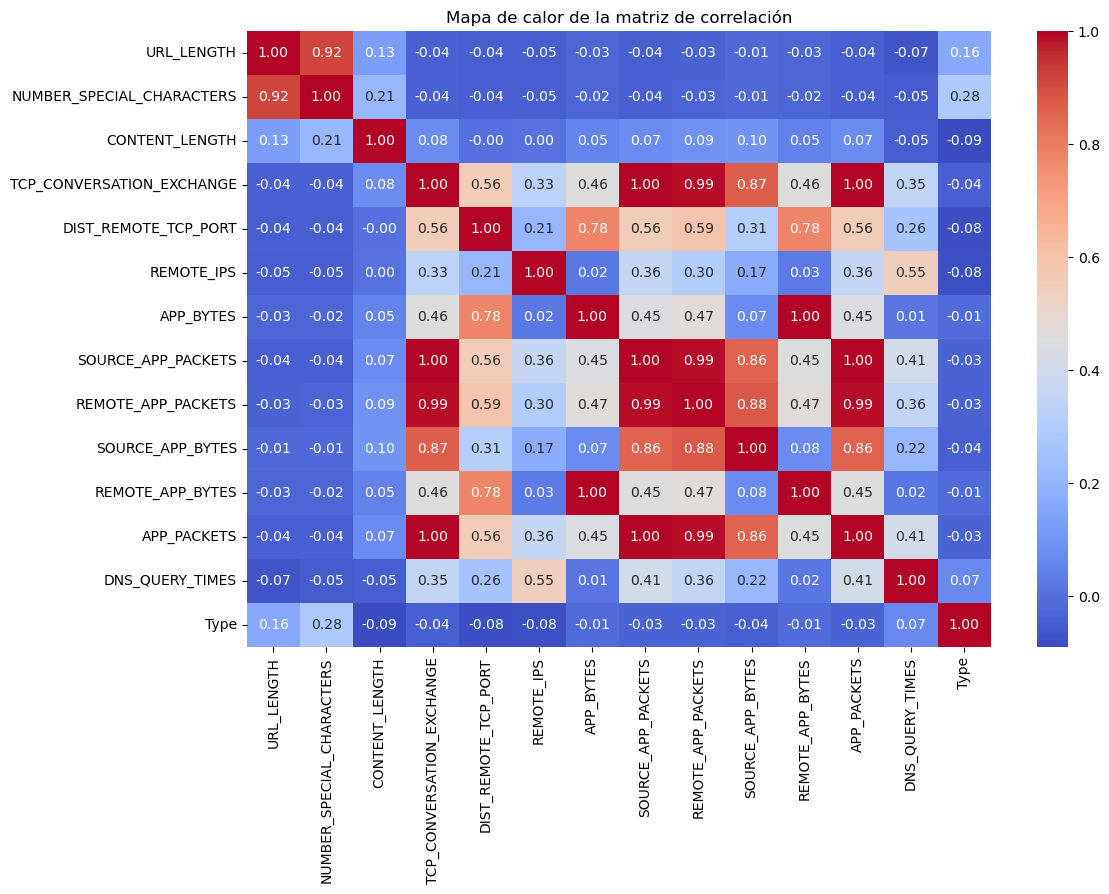


Columnas con alta correlación (>|0.8|):
                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH                    NaN                        NaN   
TCP_CONVERSATION_EXCHANGE         NaN                        NaN   
DIST_REMOTE_TCP_PORT              NaN                        NaN   
REMOTE_IPS                        NaN                        NaN   
APP_BYTES                         NaN                        NaN   
SOURCE_APP_PACKETS                NaN                        NaN   
REMOTE_APP_PACKETS                NaN                        NaN   
SOURCE_APP_BYTES                  NaN                        NaN   
REMOTE_APP_BYTES                  NaN                        NaN   
APP_PACKETS                       NaN                        NaN   
DNS_QUERY_TIMES                   NaN                        NaN   
Type   

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtrar las columnas numéricas
numeric_columns = websites.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas utilizadas para la matriz de correlación:")
print(numeric_columns)

# Crear un nuevo DataFrame solo con las columnas numéricas
numeric_data = websites[numeric_columns]

# 2. Crear la matriz de correlación
correlation_matrix = numeric_data.corr()  # Calcula la correlación entre columnas numéricas

# 3. Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

# 4. Identificar columnas con alta colinealidad
high_correlation = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]
print("\nColumnas con alta correlación (>|0.8|):")
print(high_correlation)


In [202]:
high_corr_pairs = correlation_matrix.unstack()  
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) > 0.8] 
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1.0]
high_corr_pairs = high_corr_pairs.sort_values(ascending=False)  

print("Posibles columnas a eliminar")
print("Pares de columnas con alta correlación (> 0.8 o < -0.8):")
print(high_corr_pairs)

Posibles columnas a eliminar
Pares de columnas con alta correlación (> 0.8 o < -0.8):
APP_BYTES                  REMOTE_APP_BYTES             0.999992
REMOTE_APP_BYTES           APP_BYTES                    0.999992
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
                           APP_PACKETS                  0.997796
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
                           SOURCE_APP_PACKETS           0.989285
                           APP_PACKETS                  0.989285
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
REMO

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [203]:
#! pip install xgboost

In [204]:
#X = websites._get_numeric_data().drop('Type', axis=1)
#y = websites.Type

In [205]:
#xgb.fit(X,y)

In [206]:
#sort_idx = xgb.feature_importances_.argsort()

In [207]:
#plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
#plt.show();

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pued    a conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.


Pares con alta correlación encontrados:
APP_BYTES                  REMOTE_APP_BYTES             0.999992
REMOTE_APP_BYTES           APP_BYTES                    0.999992
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
                           APP_PACKETS                  0.997796
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
REMOTE_APP_PACKETS         SOURCE_APP_PACKETS           0.989285
                           APP_PACKETS                  0.989285
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64

Eliminando columna: REMOTE_APP_BY

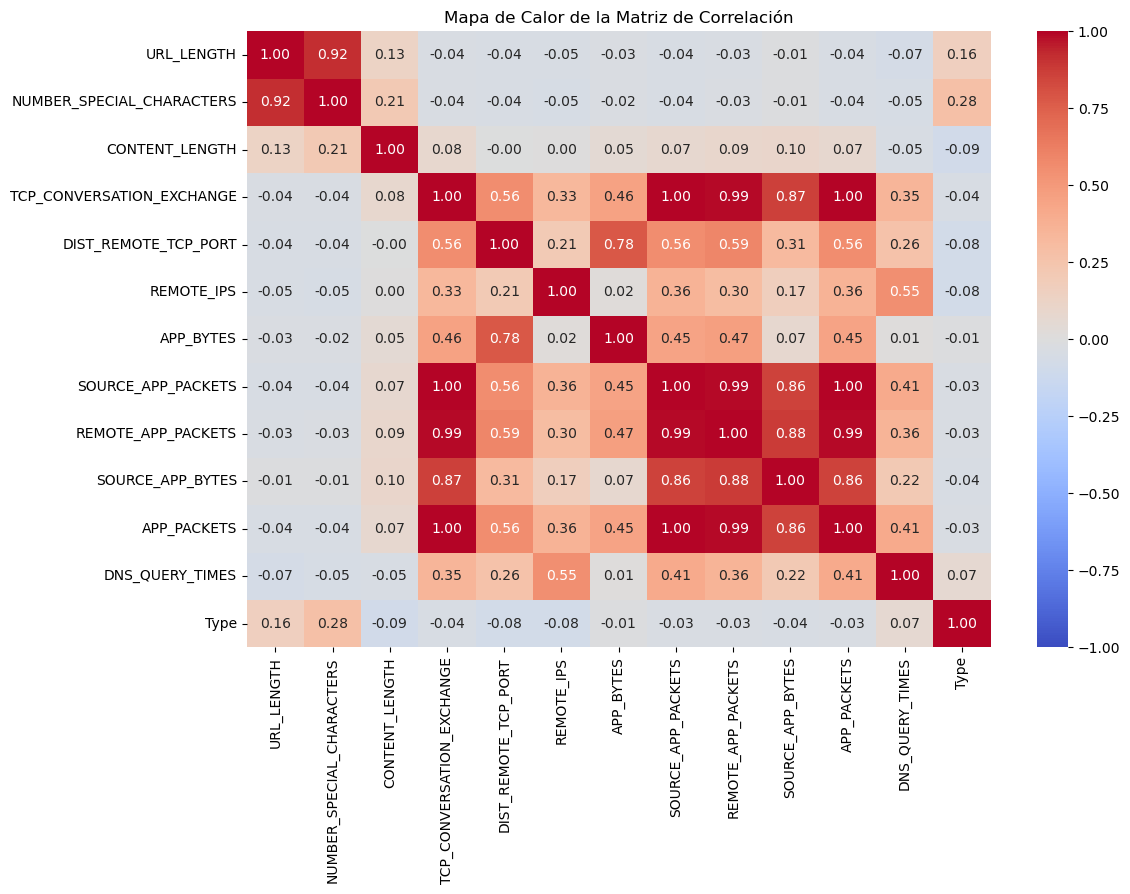


Pares con alta correlación encontrados:
TCP_CONVERSATION_EXCHANGE  SOURCE_APP_PACKETS           0.997796
                           APP_PACKETS                  0.997796
SOURCE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
SOURCE_APP_PACKETS         REMOTE_APP_PACKETS           0.989285
REMOTE_APP_PACKETS         SOURCE_APP_PACKETS           0.989285
                           APP_PACKETS                  0.989285
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64

Eliminando columna: SOURCE_APP_PACKETS


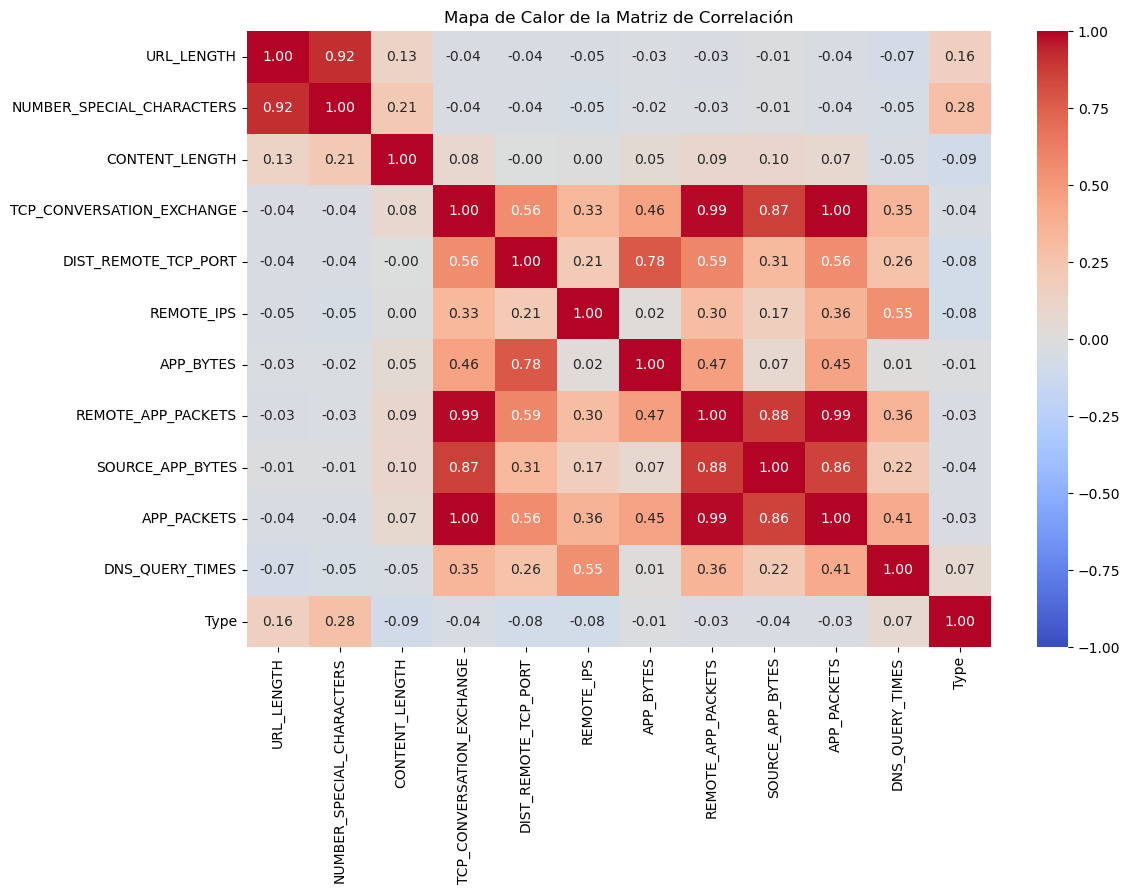


Pares con alta correlación encontrados:
TCP_CONVERSATION_EXCHANGE  APP_PACKETS                  0.997796
APP_PACKETS                TCP_CONVERSATION_EXCHANGE    0.997796
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
                           APP_PACKETS                  0.989285
APP_PACKETS                REMOTE_APP_PACKETS           0.989285
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64

Eliminando columna: APP_PACKETS


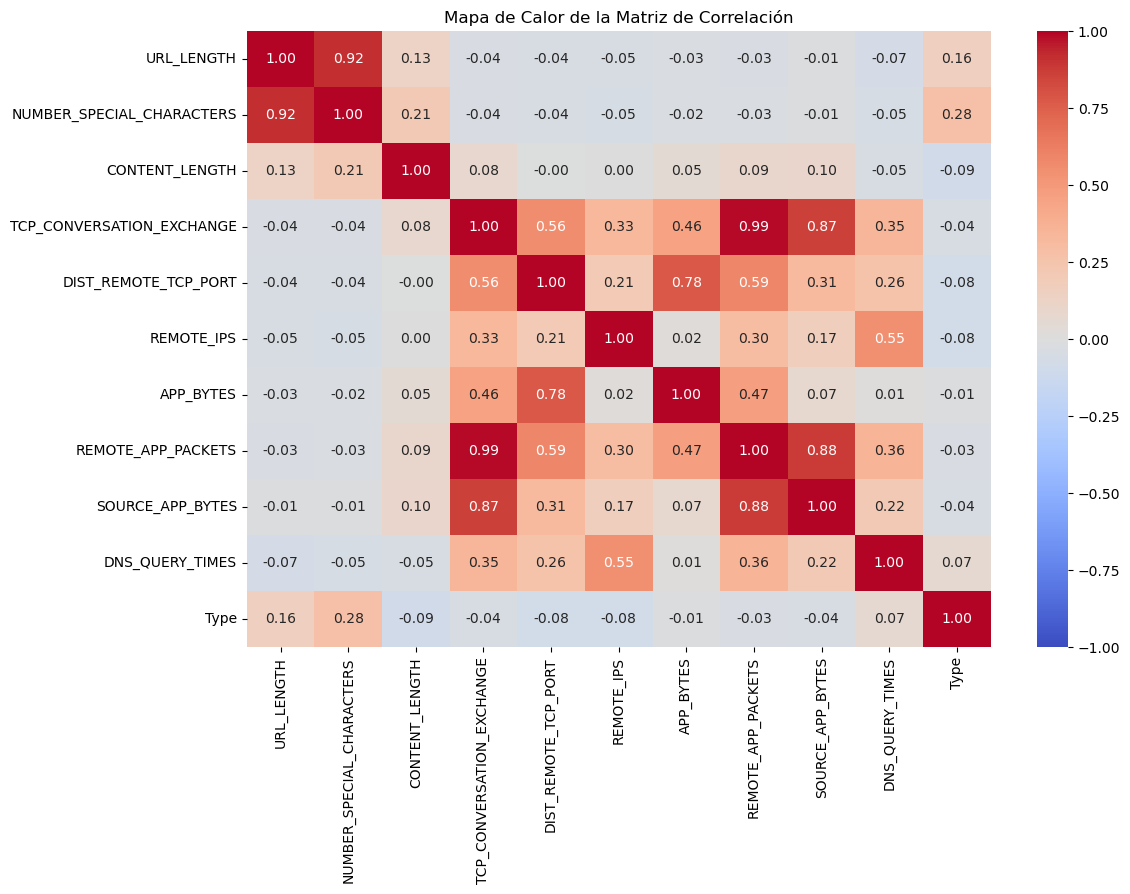


Pares con alta correlación encontrados:
TCP_CONVERSATION_EXCHANGE  REMOTE_APP_PACKETS           0.990848
REMOTE_APP_PACKETS         TCP_CONVERSATION_EXCHANGE    0.990848
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64

Eliminando columna: REMOTE_APP_PACKETS


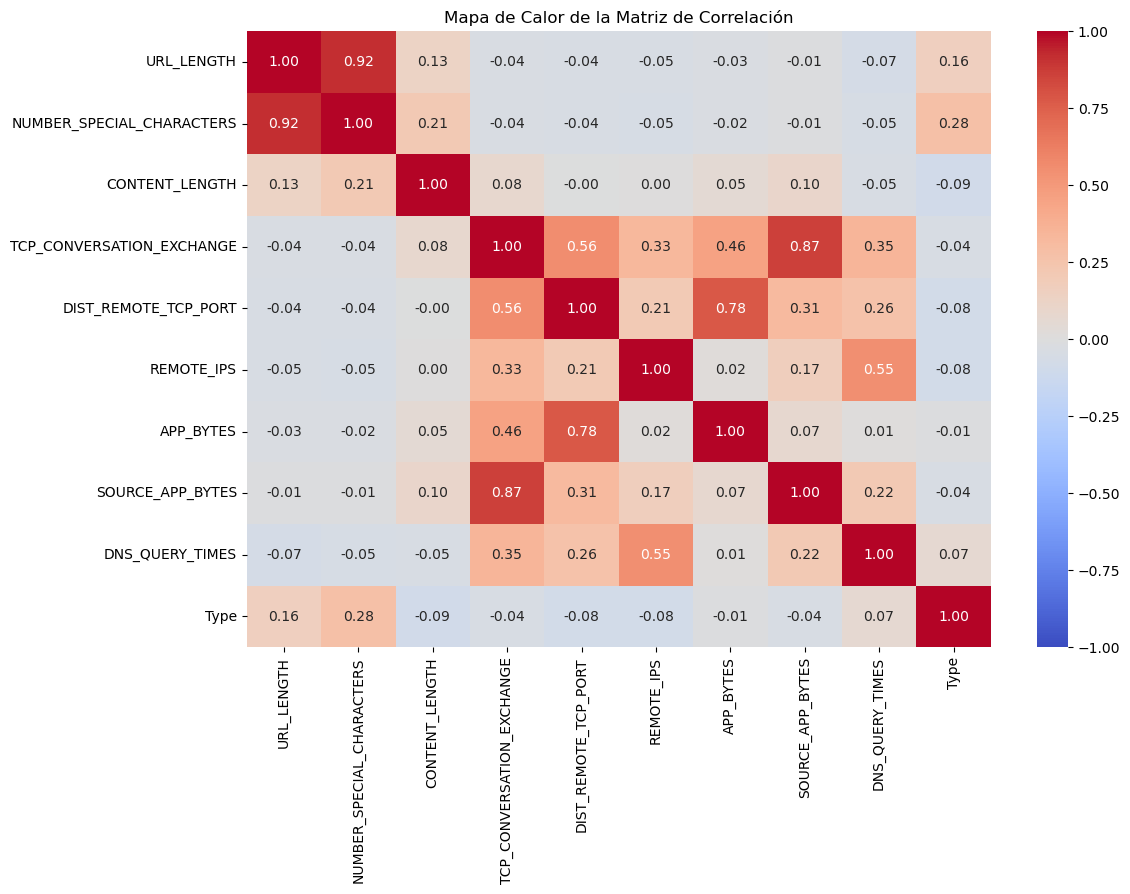


Pares con alta correlación encontrados:
URL_LENGTH                 NUMBER_SPECIAL_CHARACTERS    0.917986
NUMBER_SPECIAL_CHARACTERS  URL_LENGTH                   0.917986
dtype: float64

Eliminando columna: NUMBER_SPECIAL_CHARACTERS


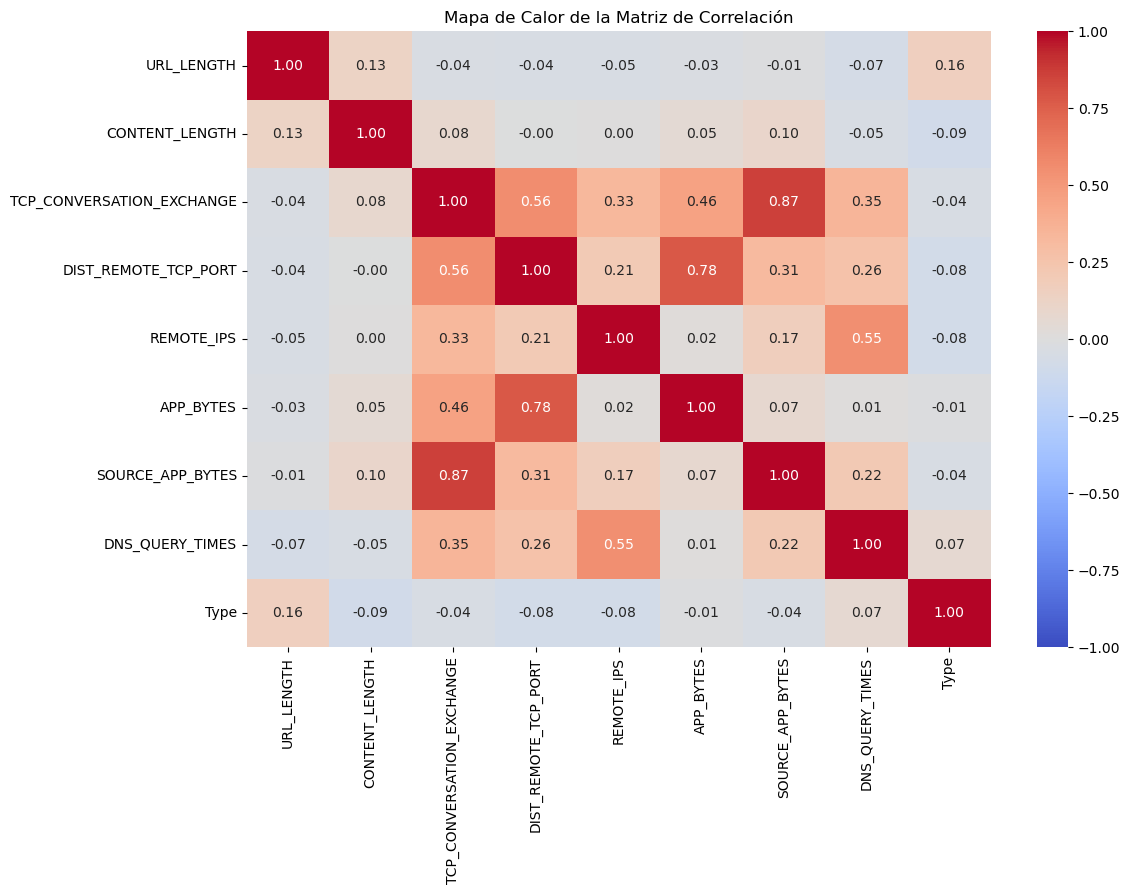

No quedan columnas con correlación mayor a 0.9

Conjunto de datos final:
       URL  URL_LENGTH     CHARSET                 SERVER  CONTENT_LENGTH  \
0   M0_109          16  iso-8859-1                  nginx           263.0   
1  B0_2314          16       UTF-8          Apache/2.4.10         15087.0   
2   B0_911          16    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
3   B0_113          17  ISO-8859-1                  nginx           162.0   
4   B0_403          17       UTF-8                    NaN        124140.0   

  WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE WHOIS_UPDATED_DATE  \
0           NaN            NaN  10/10/2015 18:21                NaN   
1           NaN            NaN               NaN                NaN   
2           NaN            NaN               NaN                NaN   
3            US             AK    7/10/1997 4:00    12/09/2013 0:45   
4            US             TX   12/05/1996 0:00    11/04/2017 0:00   

   TCP_CONVERSATION_EXCHANGE  DIST_RE

In [208]:
# Función para crear y mostrar un mapa de calor de la matriz de correlación
def plot_correlation_heatmap(data, threshold=0.9):

    numeric_data = data.select_dtypes(include=["number"])
    
    correlation_matrix = numeric_data.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Mapa de Calor de la Matriz de Correlación")
    plt.show()

# Copiar el conjunto de datos original
reduced_websites = websites.copy()

# Definir un umbral de correlación alta
threshold = 0.9

# Crear una función que elimine columnas iterativamente
def remove_highly_correlated_columns(data, threshold=0.9):
    while True:
        # Filtrar solo columnas numéricas
        numeric_data = data.select_dtypes(include=["number"])
        
        # Calcular la matriz de correlación
        correlation_matrix = numeric_data.corr()
        
        # Identificar pares con alta correlación (por encima del umbral)
        high_corr_pairs = correlation_matrix.unstack()
        high_corr_pairs = high_corr_pairs[(abs(high_corr_pairs) > threshold) & (high_corr_pairs != 1.0)]
        high_corr_pairs = high_corr_pairs.sort_values(ascending=False)
        
        # Si no quedan pares con alta correlación, salir del bucle
        if high_corr_pairs.empty:
            print("No quedan columnas con correlación mayor a", threshold)
            break
        
        # Imprimir los pares con alta correlación
        print("\nPares con alta correlación encontrados:")
        print(high_corr_pairs)

        # Identificar la primera columna del par más correlacionado
        col_to_drop = high_corr_pairs.index[0][1]
        print(f"\nEliminando columna: {col_to_drop}")
        
        # Eliminar la columna del dataset
        data = data.drop(columns=[col_to_drop])
        
        # Mostrar mapa de calor actualizado
        plot_correlation_heatmap(data)
    
    return data

# Ejecutar la función en el conjunto de datos reducido
reduced_websites = remove_highly_correlated_columns(reduced_websites)

# Mostrar el resultado final
print("\nConjunto de datos final:")
print(reduced_websites.head())


# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [209]:
missing_values = reduced_websites.isnull().sum()

print("Número de valores faltantes por columna:")
print(missing_values)


Número de valores faltantes por columna:
URL                            0
URL_LENGTH                     0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [210]:
# Firts we will drop the columns with more than 50% of missing data
threshold = len(reduced_websites) * 0.5

websites_cleaned = websites.dropna(thresh=threshold, axis=1)

print("Conjunto de datos después de eliminar columnas con más del 50% de datos faltantes:")
print(websites_cleaned.head())


Conjunto de datos después de eliminar columnas con más del 50% de datos faltantes:
       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0           NaN            NaN   
1          Apache/2.4.10         15087.0           NaN            NaN   
2  Microsoft-HTTPAPI/2.0           324.0           NaN            NaN   
3                  nginx           162.0            US             AK   
4                    NaN        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/

In [211]:
# Now we will drop the rows with missing data
websites_cleaned_rows = reduced_websites.dropna(axis=0)

print("Conjunto de datos después de eliminar filas con valores faltantes:")
print(websites_cleaned_rows.head())


Conjunto de datos después de eliminar filas con valores faltantes:
        URL  URL_LENGTH     CHARSET                 SERVER  CONTENT_LENGTH  \
3    B0_113          17  ISO-8859-1                  nginx           162.0   
6    B0_462          18  iso-8859-1               Apache/2           345.0   
7   B0_1128          19    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
11  B0_1102          20    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
16    M0_97          21  iso-8859-1                  nginx           686.0   

   WHOIS_COUNTRY       WHOIS_STATEPRO    WHOIS_REGDATE WHOIS_UPDATED_DATE  \
3             US                   AK   7/10/1997 4:00    12/09/2013 0:45   
6             US                   CO  29/07/2002 0:00     1/07/2016 0:00   
7             US                   FL  18/03/1997 0:00    19/03/2017 0:00   
11            US                   CO  22/11/2016 0:00    23/11/2016 0:00   
16            RU  Novosibirskaya obl.  25/05/2013 0:00    23/05/2016 0:00   

 

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [212]:
# Verificar cuántos valores faltantes hay en cada columna después de eliminar filas
missing_values_after_cleaning = websites_cleaned_rows.isnull().sum()

# Mostrar el número de valores faltantes por columna
print("Número de valores faltantes por columna después de eliminar filas:")
print(missing_values_after_cleaning)


Número de valores faltantes por columna después de eliminar filas:
URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [213]:
websites_cleaned_rows.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [214]:
good_country = {
    'None': 'None', 
    'US': 'US', 
    'SC': 'SC', 
    'GB': 'UK', 
    'UK': 'UK', 
    'RU': 'RU', 
    'AU': 'AU', 
    'CA': 'CA',
    'PA': 'PA',
    'se': 'SE', 
    'IN': 'IN',
    'LU': 'LU', 
    'TH': 'TH', 
    "[u'GB'; u'UK']": 'UK', 
    'FR': 'FR',
    'NL': 'NL',
    'UG': 'UG', 
    'JP': 'JP', 
    'CN': 'CN', 
    'SE': 'SE',
    'SI': 'SI', 
    'IL': 'IL', 
    'ru': 'RU', 
    'KY': 'KY', 
    'AT': 'AT', 
    'CZ': 'CZ', 
    'PH': 'PH', 
    'BE': 'BE', 
    'NO': 'NO', 
    'TR': 'TR', 
    'LV': 'LV',
    'DE': 'DE', 
    'ES': 'ES', 
    'BR': 'BR', 
    'us': 'US', 
    'KR': 'KR', 
    'HK': 'HK', 
    'UA': 'UA', 
    'CH': 'CH', 
    'United Kingdom': 'UK',
    'BS': 'BS', 
    'PK': 'PK', 
    'IT': 'IT', 
    'Cyprus': 'CY', 
    'BY': 'BY', 
    'AE': 'AE', 
    'IE': 'IE', 
    'UY': 'UY', 
    'KG': 'KG'
}

websites_cleaned_rows = websites_cleaned_rows.copy()

websites_cleaned_rows.loc[:, 'WHOIS_COUNTRY'] = websites_cleaned_rows['WHOIS_COUNTRY'].apply(lambda x: good_country.get(x, 'Unknown'))




In [215]:
websites.WHOIS_COUNTRY.unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [216]:
# URL: A menudo las URLs son cadenas que contienen información importante, pero pueden haber diferentes representaciones de URLs. Podríamos normalizarlas o categorizarlas si es necesario (aunque usualmente se elimina o se usa como categorical si contiene muchas categorías distintas).
#CHARSET: Aquí también podemos mapear valores duplicados o no estandarizados.
#SERVER: Similar a CHARSET, podríamos agrupar valores que se refieren a lo mismo.
#WHOIS_STATEPRO: Esta columna probablemente contiene información de estados o provincias que también podemos estandarizar.
#WHOIS_REGDATE y WHOIS_UPDATED_DATE: Estas columnas son fechas y deben ser convertidas al formato adecuado (si es necesario).

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

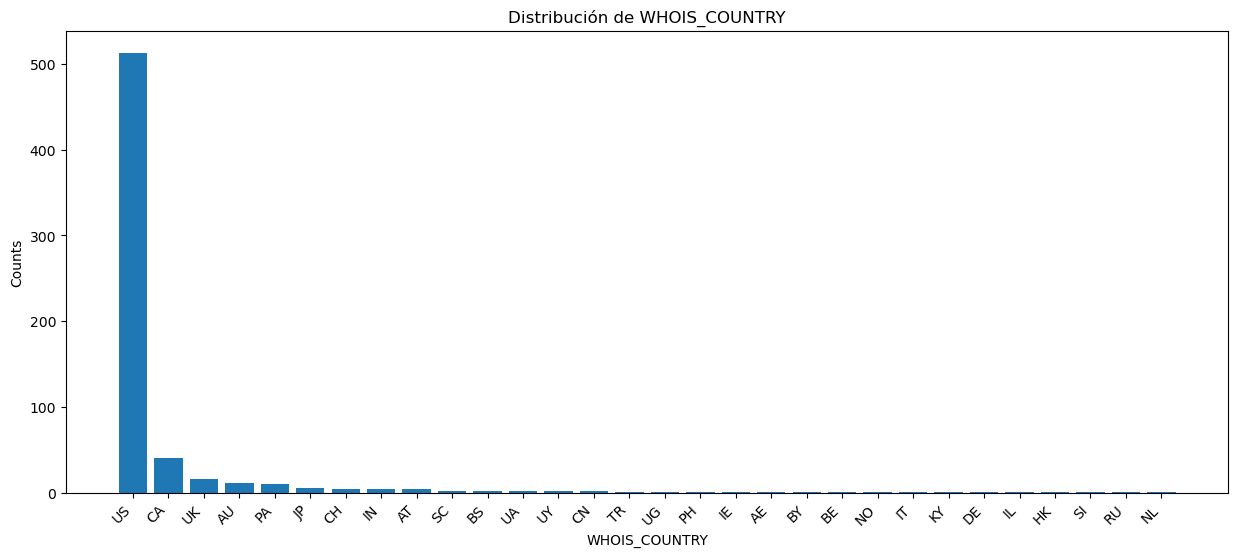

In [ ]:
# Función para imprimir el gráfico de barras
def print_bar_plot(x, y):
    plt.figure(figsize=(15, 6)) 
    plt.bar(x, y)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("WHOIS_COUNTRY")
    plt.ylabel("Counts")
    plt.title("Distribución de WHOIS_COUNTRY")
    plt.show()

country_counts = websites_cleaned_rows['WHOIS_COUNTRY'].value_counts()

print_bar_plot(country_counts.index, country_counts.values)


#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [238]:
#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.
top_10_countries = websites_cleaned_rows['WHOIS_COUNTRY'].value_counts().nlargest(10).index

websites_cleaned_rows['WHOIS_COUNTRY'] = websites_cleaned_rows['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

print(websites_cleaned_rows['WHOIS_COUNTRY'].value_counts())


WHOIS_COUNTRY
US       513
CA        41
OTHER     24
UK        16
AU        11
PA        10
JP         6
CH         5
IN         4
AT         4
SC         2
Name: count, dtype: int64


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [239]:
websites_cleaned_rows.WHOIS_COUNTRY.unique()

array(['US', 'OTHER', 'AU', 'CA', 'PA', 'UK', 'IN', 'JP', 'AT', 'SC',
       'CH'], dtype=object)

In [ ]:
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_cleaned_rows = websites_cleaned_rows.drop(columns=columns_to_drop)

print(websites_cleaned_rows.columns)


Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES',
       'Type'],
      dtype='object')


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [241]:
# Verificar los tipos de datos
print(websites_cleaned_rows.dtypes)

# Opcional: Identificar las columnas categóricas
categorical_columns = websites_cleaned_rows.select_dtypes(include=['object']).columns
print("\nColumnas categóricas restantes:")
print(categorical_columns)


URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Columnas categóricas restantes:
Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY'], dtype='object')


#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [ ]:
websites_cleaned_rows.drop(columns=['URL'], inplace=True)

print(websites_cleaned_rows.head())


    URL_LENGTH     CHARSET                 SERVER  CONTENT_LENGTH  \
3           17  ISO-8859-1                  nginx           162.0   
6           18  iso-8859-1               Apache/2           345.0   
7           19    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
11          20    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
16          21  iso-8859-1                  nginx           686.0   

   WHOIS_COUNTRY  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
3             US                         31                    22           3   
6             US                         12                     0           3   
7             US                          0                     0           0   
11            US                          0                     0           0   
16         OTHER                          6                     0           2   

    APP_BYTES  SOURCE_APP_BYTES  DNS_QUERY_TIMES  Type  
3        3812             18784          

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [ ]:
print(websites_cleaned_rows['CHARSET'].value_counts())


CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [244]:
print(websites_cleaned_rows['SERVER'].value_counts())



SERVER
Apache                    162
Microsoft-HTTPAPI/2.0      76
nginx                      59
GSE                        46
Microsoft-IIS/7.5          39
                         ... 
barista/5.1.3               1
mw2225.codfw.wmnet          1
openresty/1.11.2.2          1
Apache/2.2.23 (Amazon)      1
Apache/2.2.16 (Debian)      1
Name: count, Length: 120, dtype: int64


Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [245]:
def categorize_server(server):
    server = str(server).lower()  
    if "microsoft" in server:
        return "Microsoft"
    elif "apache" in server:
        return "Apache"
    elif "nginx" in server:
        return "nginx"
    else:
        return "Other"

websites_cleaned_rows['SERVER'] = websites_cleaned_rows['SERVER'].apply(categorize_server)

print(websites_cleaned_rows['SERVER'].value_counts())


SERVER
Apache       298
Microsoft    127
Other        108
nginx        103
Name: count, dtype: int64


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [ ]:
website_dummy = pd.get_dummies(
    websites_cleaned_rows, 
    columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'], 
    drop_first=True
)


    URL_LENGTH  CONTENT_LENGTH  TCP_CONVERSATION_EXCHANGE  \
3           17           162.0                         31   
6           18           345.0                         12   
7           19           324.0                          0   
11          20           324.0                          0   
16          21           686.0                          6   

    DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  \
3                     22           3       3812             18784   
6                      0           3       1189              8559   
7                      0           0          0                 0   
11                     0           0          0                 0   
16                     0           2        603              1580   

    DNS_QUERY_TIMES  Type  CHARSET_UTF-8  ...  WHOIS_COUNTRY_AU  \
3               8.0     0          False  ...             False   
6               2.0     0          False  ...             False   
7               0

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [247]:
print(website_dummy.dtypes)

print(website_dummy.head())


URL_LENGTH                     int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CH                bool
WHOIS_COUNTRY_IN                bool
WHOIS_COUNTRY_JP                bool
WHOIS_COUNTRY_OTHER             bool
WHOIS_COUNTRY_PA                bool
WHOIS_COUNTRY_SC                bool
WHOIS_COUNTRY_UK                bool
WHOIS_COUNTRY_US                bool
d

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [248]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
X = website_dummy.drop('Type', axis=1)  # Suponiendo que 'Type' es la etiqueta a predecir
y = website_dummy['Type']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Tamaño de X_entrenamiento: {X_entrenamiento.shape}")
print(f"Tamaño de X_prueba: {X_prueba.shape}")


Tamaño de X_entrenamiento: (508, 26)
Tamaño de X_prueba: (128, 26)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar los datos
scaler = StandardScaler()
X_entrenamiento_scaled = scaler.fit_transform(X_entrenamiento)
X_prueba_scaled = scaler.transform(X_prueba)

# Inicializar el modelo
modelo_logistico = LogisticRegression(max_iter=1000)



A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [261]:

# Ajustamos el modelo con los datos escalados
modelo_logistico.fit(X_entrenamiento_scaled, y_entrenamiento)

LogisticRegression(max_iter=1000)

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [262]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Realizamos las predicciones con el modelo ajustado
y_pred = modelo_logistico.predict(X_prueba_scaled)

# Imprimimos la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_prueba, y_pred))

# Calculamos y mostramos la puntuación de precisión
print("Puntuación de precisión:", accuracy_score(y_prueba, y_pred))


Matriz de confusión:
[[114   3]
 [  6   5]]
Puntuación de precisión: 0.9296875


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

In [263]:
#El modelo de regresión logística tiene un buen rendimiento, con una precisión del 93%. Ha clasificado correctamente la mayoría de las instancias, mostrando pocos falsos negativos (6) y falsos positivos (3). Aunque el rendimiento es sólido, si los falsos negativos son críticos, podrían implementarse ajustes adicionales o probar otros modelos para mejorar aún más los resultados.

##### A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_decision_tree = DecisionTreeClassifier(max_depth=3)

modelo_decision_tree.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_prob = modelo_decision_tree.predict_proba(X_prueba)[:, 1]

# Decidir 0 o 1 utilizando el umbral de 0.5
y_pred = (y_prob >= 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_prueba, y_pred)

# Calcular la puntuación de precisión
accuracy = accuracy_score(y_prueba, y_pred)

print("Matriz de confusión:")
print(conf_matrix)

print("Puntuación de precisión:", accuracy)


Matriz de confusión:
[[117   0]
 [ 11   0]]
Puntuación de precisión: 0.9140625


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [ ]:
modelo_decision_tree_5 = DecisionTreeClassifier(max_depth=5)

modelo_decision_tree_5.fit(X_entrenamiento, y_entrenamiento)

y_prob_5 = modelo_decision_tree_5.predict_proba(X_prueba)[:, 1]

y_pred_5 = (y_prob_5 >= 0.5).astype(int)

conf_matrix_5 = confusion_matrix(y_prueba, y_pred_5)

accuracy_5 = accuracy_score(y_prueba, y_pred_5)

print("Matriz de confusión (max_depth=5):")
print(conf_matrix_5)

print("Puntuación de precisión (max_depth=5):", accuracy_5)


Matriz de confusión (max_depth=5):
[[115   2]
 [  9   2]]
Puntuación de precisión (max_depth=5): 0.9140625


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

In [ ]:
# un max_depth mayor puede hacer que el modelo se ajuste más a los datos de entrenamiento, no necesariamente mejora el rendimiento en los datos de prueba, y en este caso ha reducido ligeramente la capacidad predictiva del modelo.

### Conclusión:

#### La regresión logística sigue siendo una opción más confiable y robusta en este caso, con mejores resultados en términos de generalización.
#### El árbol de decisión, especialmente con un max_depth mayor, puede ser útil para capturar relaciones complejas, pero se debe tener cuidado con el sobreajuste. En este caso específico, el modelo de árbol de decisión no mostró una mejora significativa respecto a la regresión logística.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [234]:
# Your code here

## Conclusiones:

###Preprocesamiento de Datos: Se limpiaron y transformaron variables categóricas, mejorando los datos.


###Modelos: La Regresión Logística mostró mejor rendimiento (precisión de 0.93), mientras que el Árbol de Decisión sufrió de sobreajuste.


###Lecciones: La Regresión Logística es más confiable para este conjunto de datos.